In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Assignment 10

In [2]:
train=pd.read_csv("C:\\Users\\91701\\Desktop\\trainKNN.txt",header=None,
               names=["Id number","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])


In [3]:
test=pd.read_csv("C:\\Users\\91701\\Desktop\\testKNN.txt",header=None,
               names=["Id number","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])

In [4]:
xtrain=train.iloc[:,0:10]
ytrain=train.iloc[:,10]
xtest=test.iloc[:,0:10]
ytest=test.iloc[:,10]

In [5]:
l=[]
for i in range(1,100):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain,ytrain)
    yp=model.predict(xtest)
    l.append(accuracy_score(ytest,yp))
print(l.index(max(l))+1)  #best neigbhors  

2


In [6]:
model=KNeighborsClassifier(n_neighbors=2)
model.fit(xtrain,ytrain)
yp=model.predict(xtest)

In [7]:
accuracy_score(ytest,yp)

0.8333333333333334

In [8]:
imp=RandomForestClassifier()
imp.fit(xtrain,ytrain)
imp.feature_importances_

array([0.4707934 , 0.0663735 , 0.05862717, 0.08804844, 0.09330404,
       0.03429033, 0.04389701, 0.06140238, 0.06916633, 0.01409739])

In [9]:
impor=pd.DataFrame(imp.feature_importances_,index=xtrain.columns,columns=["importance"]).sort_values(by="importance",ascending=False)

In [10]:
impor

,importance
Id number,0.470793
Al,0.093304
Mg,0.088048
Ba,0.069166
RI,0.066374
Ca,0.061402
Na,0.058627
K,0.043897
Si,0.034290
Fe,0.014097


New xtrian and xtest after reduction in features

In [11]:
mxtrain1=xtrain.iloc[:,0:9]
mxtest1=xtest.iloc[:,0:9]

In [12]:
#standardization
st=StandardScaler()
st.fit(mxtrain1)
st.fit(mxtest1)
std_xtrain = st.transform(mxtrain1)
std_xtest = st.transform(mxtest1)

In [13]:
#feature importance
imp=RandomForestClassifier()
imp.fit(std_xtrain,ytrain)
imp.feature_importances_

array([0.54166928, 0.0488943 , 0.05236028, 0.07707488, 0.08069003,
       0.02213469, 0.04095301, 0.05199497, 0.08422856])

In [14]:
stdimpo=pd.DataFrame(imp.feature_importances_,
                     index=mxtrain1.columns,columns=["importance"]).sort_values(by="importance",ascending=False)

In [15]:
model1=KNeighborsClassifier(n_neighbors=2,metric='manhattan')
model1.fit(std_xtrain,ytrain)
myp11=model1.predict(std_xtest)

In [16]:
accuracy_score(ytest,myp11) #accuracy for manhattan metric

0.8888888888888888

In [17]:
model12=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model12.fit(std_xtrain,ytrain)
myp112=model1.predict(std_xtest)

In [18]:
accuracy_score(ytest,myp112) #accuracy for euclidean metric

0.8888888888888888

# Assignment 11

Step 1: Importing the libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Step 2: Importing dataset

In [20]:
f=pd.read_csv("C:\\Users\\91701\\Desktop\\Data.csv")

In [21]:
f

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Step 3: Handling the missing data

In [22]:
modf=f.fillna(method="ffill")
modf

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,35.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Step 4: Encoding categorical data

In [23]:
df=modf.replace({"No":0,"Yes":1})

In [24]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,61000.0,1
5,France,35.0,58000.0,1
6,Spain,35.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


Step 5: Creating a dummy variable

In [25]:
dummy=pd.get_dummies(df)
dummy

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,0,1,0,0
1,27.0,48000.0,1,0,0,1
2,30.0,54000.0,0,0,1,0
3,38.0,61000.0,0,0,0,1
4,40.0,61000.0,1,0,1,0
5,35.0,58000.0,1,1,0,0
6,35.0,52000.0,0,0,0,1
7,48.0,79000.0,1,1,0,0
8,50.0,83000.0,0,0,1,0
9,37.0,67000.0,1,1,0,0


Step 6: Splitting the datasets into training sets and Test sets

In [26]:
x=dummy.iloc[:,[0,1,3,4,5]]
y=dummy.iloc[:,2]
xtrainc,xtestc,ytrainc,ytestc=train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
xtrainc

,Age,Salary,Country_France,Country_Germany,Country_Spain
4,40.0,61000.0,0,1,0
0,44.0,72000.0,1,0,0
3,38.0,61000.0,0,0,1
1,27.0,48000.0,0,0,1
7,48.0,79000.0,1,0,0
8,50.0,83000.0,0,1,0
5,35.0,58000.0,1,0,0


In [28]:
ytrainc

4    1
0    0
3    0
1    1
7    1
8    0
5    1
Name: Purchased, dtype: int64

In [29]:
xtestc

,Age,Salary,Country_France,Country_Germany,Country_Spain
2,30.0,54000.0,0,1,0
9,37.0,67000.0,1,0,0
6,35.0,52000.0,0,0,1


In [30]:
ytestc

2    0
9    1
6    0
Name: Purchased, dtype: int64

Step 7: Feature Scaling

In [31]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaler.fit(xtrainc)
scaler.fit(xtestc)
xscale=scaler.transform(xtrainc)
xtscale=scaler.transform(xtestc)

In [32]:
xscale

array([[ 1.85714286,  0.2       , -1.        ,  1.        , -1.        ],
       [ 3.        ,  1.66666667,  1.        , -1.        , -1.        ],
       [ 1.28571429,  0.2       , -1.        , -1.        ,  1.        ],
       [-1.85714286, -1.53333333, -1.        , -1.        ,  1.        ],
       [ 4.14285714,  2.6       ,  1.        , -1.        , -1.        ],
       [ 4.71428571,  3.13333333, -1.        ,  1.        , -1.        ],
       [ 0.42857143, -0.2       ,  1.        , -1.        , -1.        ]])

In [33]:
xtscale

array([[-1.        , -0.73333333, -1.        ,  1.        , -1.        ],
       [ 1.        ,  1.        ,  1.        , -1.        , -1.        ],
       [ 0.42857143, -1.        , -1.        , -1.        ,  1.        ]])

# Assignment 15

Importing the libraries

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pl

Importing the dataset

In [35]:
df1=pd.read_csv("C:\\Users\\91701\\Desktop\\Social_Network_Ads.csv")

In [36]:
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Splitting the dataset into the Training set and Test set

In [37]:
x=df1.iloc[:,0:4]
y=df1.iloc[:,4]
xstrain,xstest,ystrain,ystest=train_test_split(x,y,test_size=0.3,random_state=1)

Feature Scaling

In [38]:
skal=MinMaxScaler(feature_range=(0,1))
skal.fit(pd.get_dummies(x))
sk_x=skal.transform(pd.get_dummies(x))
sk_x

array([[0.23263608, 0.02380952, 0.02962963, 0.        , 1.        ],
       [0.98273164, 0.4047619 , 0.03703704, 0.        , 1.        ],
       [0.40992649, 0.19047619, 0.20740741, 1.        , 0.        ],
       ...,
       [0.35247659, 0.76190476, 0.03703704, 1.        , 0.        ],
       [0.75771987, 0.42857143, 0.13333333, 0.        , 1.        ],
       [0.1100476 , 0.73809524, 0.15555556, 1.        , 0.        ]])

Fitting Decision Tree Classification to the Training set

In [39]:
modeld=DecisionTreeClassifier()
modeld.fit(pd.get_dummies(xstrain),ystrain)
modeld.predict(pd.get_dummies(xstest)) #categorical data

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [40]:
accuracy_score(ystest,modeld.predict(pd.get_dummies(xstest)))

0.7916666666666666

Making the Confusion Matrix

In [41]:
m=confusion_matrix(ystest,modeld.predict(pd.get_dummies(xstest)))
m

array([[57, 15],
       [10, 38]], dtype=int64)

Visualising the Training set results

IndexError: index 4 is out of bounds for axis 0 with size 4

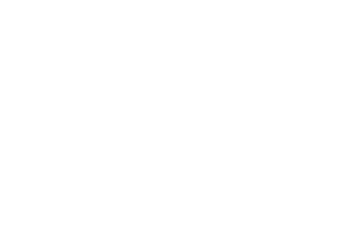

In [42]:
from sklearn.tree import plot_tree
modelv  = DecisionTreeClassifier()
modelv.fit(pd.get_dummies(xstrain),ystrain)
print(plot_tree(modelv, feature_names=xstrain.columns))

Visualising the Test set results

In [ ]:
modelvt  = DecisionTreeClassifier()
modelvt.fit(pd.get_dummies(xstest),ystest)
print(plot_tree(modelv, feature_names=xstest.columns))

# Assignment 13

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

Importing the dataset

In [ ]:
df1=pd.read_csv("C:\\Users\\91701\\Desktop\\Social_Network_Ads.csv")

In [ ]:
df1

Feature Scaling

In [ ]:
x=df1.iloc[:,0:4]
y=df1.iloc[:,4]
f_scale=MinMaxScaler(feature_range=(0,1))
f_scale.fit(pd.get_dummies(x))
sk_scale=f_scale.transform(pd.get_dummies(x))

Splitting the dataset into the Training set and Test set

In [ ]:
xktrain,xktest,yktrain,yktest=train_test_split(sk_scale,y,test_size=0.3,random_state=1)

Fitting K-NN to the Training set

In [ ]:
params = {'metric':['manhattan','euclidean','cosine'],
         'weights':['uniform','distance'],
         'n_neighbors':list(range(1,20))}
modelkn = KNeighborsClassifier()
kf = KFold(n_splits = 10)
gv = GridSearchCV(model,param_grid = params,cv = kf,scoring = 'accuracy' )


In [ ]:
gv.fit(xktrain,yktrain)

In [ ]:
gv.best_params_

In [ ]:
gv.best_score_

In [ ]:
modelk=KNeighborsClassifier(n_neighbors=3,metric="euclidean",weights="distance")
modelk.fit(xktrain,yktrain)
modelk.predict(xktest)

In [ ]:
accuracy_score(yktest,modelk.predict(xktest))

Making the Confusion Matrix

In [ ]:
con=confusion_matrix(yktest,modelk.predict(xktest))

In [ ]:
con

# Assignment 12

Importing the Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as pl

Importing the dataset

In [ ]:
 age and the estimated salary

In [ ]:
df1=pd.read_csv("C:\\Users\\91701\\Desktop\\Social_Network_Ads.csv")
df1

Splitting the dataset into the Training set and Test set

In [ ]:
xc=df1.loc[:,["Age","EstimatedSalary"]]
yc=df1.loc[:,"Purchased"]

In [ ]:
xctrain,xctest,yctrain,yctest=train_test_split(xc,yc,test_size=0.3,random_state=1)

Feature Scaling

In [ ]:
sk=MinMaxScaler(feature_range=(0,1))
sk.fit(xctrain)
sk.fit(xctest)
skxctrain=sk.transform(xctrain)
skxctest=sk.transform(xctest)

Logistic Regression Model

##Fitting Logistic Regression to the Training set

In [ ]:
modellog=LogisticRegression(max_iter=1000)
kf= KFold(n_splits=10)
p={"penalty":["l1","l2","elasticnet"],"tol":[0.001,0.002,0.0001],"class_weight":["dict","balanced","None"],
  "l1_ratio":[0.5,0.4,0.3]}

In [ ]:
gvlog=GridSearchCV(modellog,param_grid=p,cv=kf,scoring='accuracy')

In [ ]:
gvlog.fit(skxctrain,yctrain)

In [ ]:
gvlog.best_params_

In [ ]:
modellog=LogisticRegression(max_iter=1000,class_weight='balanced', penalty='l2', tol= 0.001)

In [ ]:
modellog.fit(skxctrain,yctrain)

Step 3 | Predection

In [ ]:
ylopred=modellog.predict(skxctest)
ylopred

Step 4 | Evaluating The Predection

In [ ]:
accuracy_score(yctest,ylopred)

In [ ]:
r2_score(yctest,ylopred)

Making the Confusion Matrix

In [ ]:
confusion_matrix(yctest,ylopred)

Visualization

In [ ]:

pl.scatter(range(1,121),yctest,color='red')
pl.scatter(range(1,121),ylopred,color='blue')
pl.legend(['actual','predicted'])
pl.title('Logistic Regression')
pl.xlabel('Purchased')
pl.ylabel('SNo')

# Assignment 16

Importing the libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pl

Importing the dataset

In [82]:
f=pd.read_csv("C:\\Users\\91701\\Desktop\\Social_Network_Ads.csv")

In [83]:
f

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Splitting the dataset into the Training set and Test set

In [49]:
new_f=pd.get_dummies(f)

In [51]:
new_f.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [52]:
xsn=new_f.loc[:,["User ID","Age","EstimatedSalary", 'Gender_Female',
       'Gender_Male']]

In [54]:
xsn

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,1,0
3,15603246,27,57000,1,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,0,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [55]:
ysn=new_f.loc[:,["Purchased"]]

In [56]:
ysn

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [59]:
xrtrain,xrtest,yrtrain,yrtest=train_test_split(xsn,ysn,test_size=0.3,random_state=0)

Feature Scaling

In [81]:
skl=MinMaxScaler()
skl.fit(np.array(xsn))
skl.transform(xsn)

C:\Users\91701\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.23263608, 0.02380952, 0.02962963, 0.        , 1.        ],
       [0.98273164, 0.4047619 , 0.03703704, 0.        , 1.        ],
       [0.40992649, 0.19047619, 0.20740741, 1.        , 0.        ],
       ...,
       [0.35247659, 0.76190476, 0.03703704, 1.        , 0.        ],
       [0.75771987, 0.42857143, 0.13333333, 0.        , 1.        ],
       [0.1100476 , 0.73809524, 0.15555556, 1.        , 0.        ]])

Fitting Random Forest to the Training set

In [67]:
kf=KFold(n_splits=10)
modelrf=RandomForestClassifier(n_jobs=-1)
p={"n_estimators":list(range(100,400,50)),"criterion":['gini', 'entropy',],'max_samples':[0.8,0.9],
   'max_features':[0.5, 0.75],"ccp_alpha":[0.001,0.01,0.1]}
gv=GridSearchCV(modelrf,param_grid=p,cv=kf,scoring='accuracy')


In [68]:
gv.fit(xrtrain,yrtrain)

C:\Users\91701\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91701\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91701\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\91701\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [0.5, 0.75], 'max_samples': [0.8, 0.9],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='accuracy')

In [69]:
gv.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_features': 0.5,
 'max_samples': 0.8,
 'n_estimators': 150}

In [70]:
mrf=RandomForestClassifier(ccp_alpha= 0.01,
 criterion= 'gini',
 max_features=0.5,
 max_samples= 0.8,
 n_estimators= 150)

In [71]:
mrf.fit(xrtrain,yrtrain)

C:\Users\91701\AppData\Local\Temp\ipykernel_20852\3603756894.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mrf.fit(xrtrain,yrtrain)


RandomForestClassifier(ccp_alpha=0.01, max_features=0.5, max_samples=0.8,
                       n_estimators=150)

Predicting the Test set results

In [72]:
mrf.predict(xrtest)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [73]:
accuracy_score(yrtest,mrf.predict(xrtest))

0.9166666666666666

Making the Confusion Matrix

In [74]:
confusion_matrix(yrtest,mrf.predict(xrtest))

array([[72,  7],
       [ 3, 38]], dtype=int64)

Visualising the Training set results

Text(0, 0.5, 'SNo')

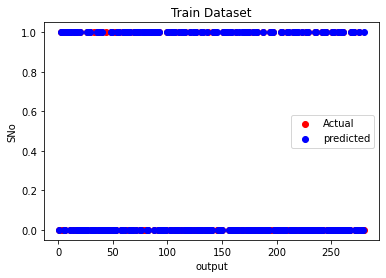

In [78]:
pl.scatter(range(1,281),yrtrain,color='red')
pl.scatter(range(1,281),mrf.predict(xrtrain),color='blue')
pl.legend(["Actual","predicted"])
pl.title("Train Dataset")
pl.xlabel("output")
pl.ylabel("SNo")

Visualising the Test set results

Text(0, 0.5, 'SNo')

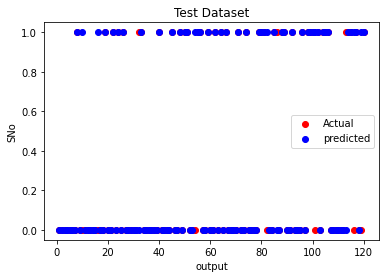

In [79]:
pl.scatter(range(1,121),yrtest,color='red')
pl.scatter(range(1,121),mrf.predict(xrtest),color='blue')
pl.legend(["Actual","predicted"])
pl.title("Test Dataset")
pl.xlabel("output")
pl.ylabel("SNo")

# Assignment 14

Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pl
from sklearn.svm import SVC


Importing the dataset

In [2]:
sv=pd.get_dummies(pd.read_csv("C:\\Users\\91701\\Desktop\\Social_Network_Ads.csv"))

In [3]:
sv

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


Splitting the dataset into the Training set and Test set

In [4]:
xsvc=sv.loc[:,["User ID","Age","EstimatedSalary", 'Gender_Female',
       'Gender_Male']]
ysvc=sv.loc[:,["Purchased"]]

In [5]:
xsvctrain,xsvctest,ysvctrain,ysvctest=train_test_split(xsvc,ysvc,test_size=0.3,random_state=0)

Feature Scaling

In [6]:
skl=MinMaxScaler()
skl.fit(np.array(xsvc))
skl.transform(xsvc)

C:\Users\91701\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.23263608, 0.02380952, 0.02962963, 0.        , 1.        ],
       [0.98273164, 0.4047619 , 0.03703704, 0.        , 1.        ],
       [0.40992649, 0.19047619, 0.20740741, 1.        , 0.        ],
       ...,
       [0.35247659, 0.76190476, 0.03703704, 1.        , 0.        ],
       [0.75771987, 0.42857143, 0.13333333, 0.        , 1.        ],
       [0.1100476 , 0.73809524, 0.15555556, 1.        , 0.        ]])

Fitting SVM to the Training set

In [7]:
svc=SVC(probability=True,kernel = 'poly',degree=2)

In [ ]:
svc.fit(

Predicting the Test set results

In [8]:
svc.predict(xsvctest)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
accuracy_score(ysvctest,svc.predict(xsvctest))

Making the Confusion Matrix

In [ ]:
confusion_matrix(ysvctest,svc.predict(xsvctest))

Visualising the Training set results

In [ ]:
pl.scatter(range(1,281),ysvctrain,color='red')
pl.scatter(range(1,281),svc.predict(xsvctrain),color='blue')
pl.legend(["Actual","predicted"])
pl.title("Train Dataset")
pl.xlabel("output")
pl.ylabel("SNo")

Visualising the Test set results

In [ ]:
pl.scatter(range(1,121),ysvctest,color='red')
pl.scatter(range(1,121),mrf.predict(xsvctest),color='blue')
pl.legend(["Actual","predicted"])
pl.title("Test Dataset")
pl.xlabel("output")
pl.ylabel("SNo")